# Introduction to Convolutional Neural Networks

In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images {dirpath}')

There are 3 directories and 0 images pizza_steak
There are 2 directories and 0 images pizza_steak\pizza_steak
There are 2 directories and 0 images pizza_steak\pizza_steak\test
There are 0 directories and 250 images pizza_steak\pizza_steak\test\pizza
There are 0 directories and 250 images pizza_steak\pizza_steak\test\steak
There are 2 directories and 0 images pizza_steak\pizza_steak\train
There are 0 directories and 750 images pizza_steak\pizza_steak\train\pizza
There are 0 directories and 750 images pizza_steak\pizza_steak\train\steak
There are 2 directories and 0 images pizza_steak\test
There are 0 directories and 250 images pizza_steak\test\pizza
There are 0 directories and 250 images pizza_steak\test\steak
There are 2 directories and 0 images pizza_steak\train
There are 0 directories and 750 images pizza_steak\train\pizza
There are 0 directories and 750 images pizza_steak\train\steak


In [3]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [4]:
# Get the class names programmatically
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from sub directory
print(class_names)

['pizza' 'steak']


In [5]:
# Let's visualize our images
def view_random_image(target_dir, target_class):
    # Set up the target directory (we'll view images from here)
    target_folder = target_dir + '/' + target_class

    # Get a random image path
    random_image = np.random.choice(os.listdir(target_folder))
    print(random_image)

    # Read in the image and  plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}') # Show the shape of the image

    return img

2428085.jpg
Image shape: (384, 512, 3)


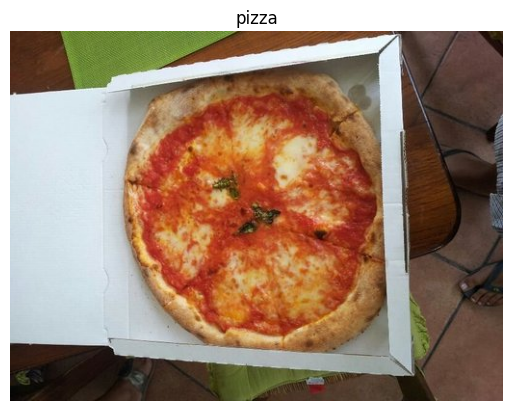

In [6]:
img = view_random_image(target_dir='./pizza_steak/train', target_class='pizza')

In [7]:
img = tf.constant(img/255.)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess data(det all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./225)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary')

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary')


# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 79s 2s/step - loss: 0.5776 - accuracy: 0.7093 - val_loss: 0.4687 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 92s 2s/step - loss: 0.4624 - accuracy: 0.7880 - val_loss: 0.4781 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 99s 2s/step - loss: 0.4310 - accuracy: 0.8120 - val_loss: 0.3753 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 81s 2s/step - loss: 0.4082 - accuracy: 0.8220 - val_loss: 0.3967 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 81s 2s/step - loss: 0.3386 - accuracy: 0.8513 - val_loss: 0.3554 - val_accuracy: 0.8520


In [10]:
model_1.save('cnn', save_format='h5')